# 911 Calls Project

This project analyzed a database of 911 calls from [Kaggle](https://www.kaggle.com/mchirico/montcoalert).

The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

## Data and Setup

Import libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Setting the data visualization style:

In [2]:
sns.set_theme(style = "whitegrid", font_scale = 0.8)
%matplotlib inline

Reading and checking the data:

In [3]:
df = pd.read_csv('911-Calls-Dataset.csv')
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


## Basic Questions

What are the top 5 zipcodes for 911 calls?

In [4]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

What are the top 5 townships (twp) for 911 calls?

In [5]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

Take a look at the 'title' column, how many unique title codes are there?

In [6]:
df['title'].nunique()

110

## Creating new features

Adding a new "reason" column to the dataframe:

In [7]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


What is the most common Reason for a 911 call based off of this new column?

In [8]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

- EMS is the most common reason to call 911.

Let's build a countplot of 911 calls for reasons:

<AxesSubplot: xlabel='reason', ylabel='count'>

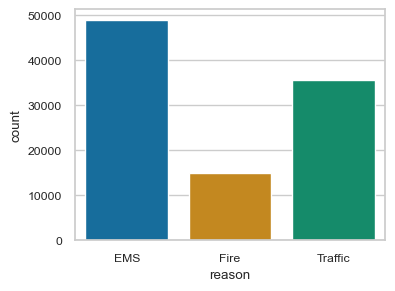

In [9]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(data = df, x = df['reason'], palette = 'colorblind')

___
Let's process the "timeStamp" column and create new columns for the "hour", "month" and "dayOfWeek":

In [10]:
type(df['timeStamp'][0])

str

* The original data type is a string.

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
type(df['timeStamp'][0])

pandas._libs.tslibs.timestamps.Timestamp

* A new data type - datetime.

In [12]:
dmap = {0: 'Mon', 1: 'Tue', 2: 'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['dayOfWeek'] = df['timeStamp'].apply(lambda x: dmap[x.day_of_week])

In [13]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayOfWeek
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


Let's create a chart of what day of the week there were calls by reasons:

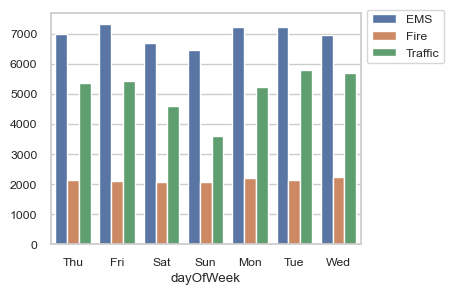

In [14]:
fig, ax = plt.subplots(figsize=(4, 3))
sns.countplot(data = df, x = df['dayOfWeek'], hue = df['reason']).set(ylabel = None)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.9))

The same for month:

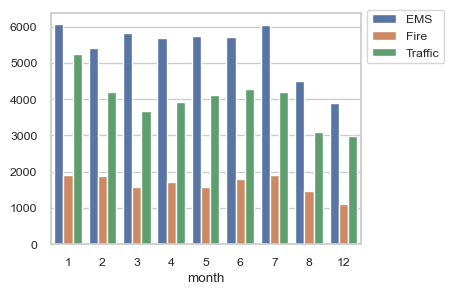

In [15]:
fig, ax = plt.subplots(figsize = (4, 3))
sns.countplot(data = df, x = df['month'], hue = df['reason']).set(ylabel = None)
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.9))

* The data does not contain information about 9-11 months.

___
Let's group the dataframe by month and plot it to understand what the numbers might have been in months 9-11:

In [16]:
byMonth = df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayOfWeek
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


Plot our data:

[Text(0, 0.5, '')]

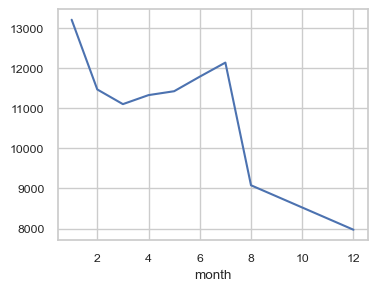

In [17]:
fig, ax = plt.subplots(figsize = (4, 3))
sns.lineplot(data = byMonth['e']).set(ylabel = None)

Let's find the estimated values using linear regression:

In [18]:
byMonth = byMonth.reset_index()

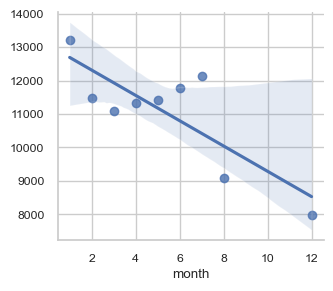

In [19]:
sns.lmplot(data = byMonth, x = 'month', y = 'e', height = 3, aspect = 1.2).set(ylabel = None)


Create a new column called "date" that contains the date from the "timeStamp" column: 


In [20]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

Let's group data by date and visualize it:

In [21]:
byDate = df.groupby('date').count()
byDate.reset_index().head()

,date,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayOfWeek
0,2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
1,2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2,2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
3,2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
4,2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


[Text(0, 0.5, '')]

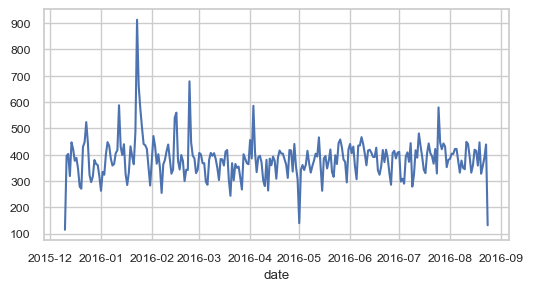

In [22]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.lineplot(data = byDate, x = 'date', y = 'e').set(ylabel = None)

Now let's divide the previous chart by the reasons for the calls:

In [23]:
EMS = df[df['reason'] == 'EMS']
byEMS = EMS.groupby(['date']).count().reset_index()

[Text(0, 0.5, '')]

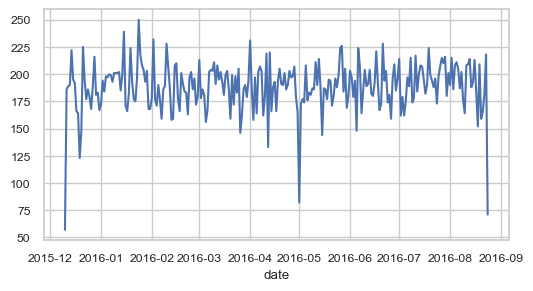

In [24]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.lineplot(data = byEMS, x = 'date', y = 'e').set(ylabel = None)

In [25]:
Fire = df[df['reason'] == 'Fire']
byFire = Fire.groupby(['date']).count().reset_index()

[Text(0, 0.5, '')]

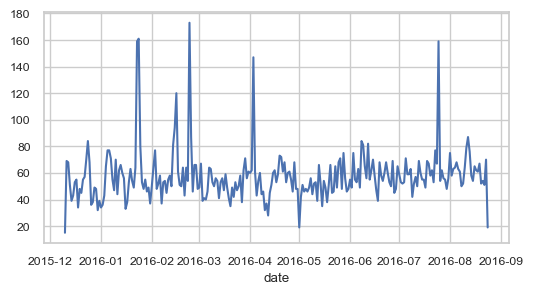

In [26]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.lineplot(data = byFire, x = 'date', y = 'e').set(ylabel = None)

In [27]:
Traffic = df[df['reason'] == 'Traffic']
byTraffic = Traffic.groupby(['date']).count().reset_index()

[Text(0, 0.5, '')]

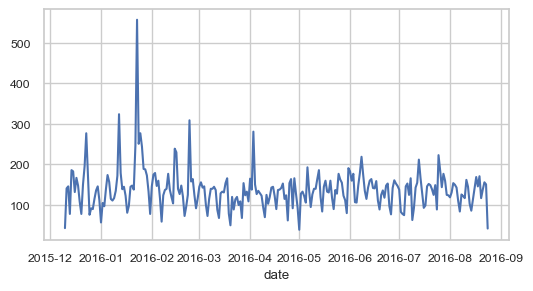

In [28]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.lineplot(data = byTraffic, x = 'date', y = 'e').set(ylabel = None)

____
Restructure the dataframe and build heatmaps/clustermaps for better understanding and analysis.

In relation to the days of the week:

In [29]:
byHourAndDay = df.groupby(['hour', 'dayOfWeek']).count()['reason'].unstack(level = 0)
byHourAndDay

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dayOfWeek,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


<AxesSubplot: xlabel='hour', ylabel='dayOfWeek'>

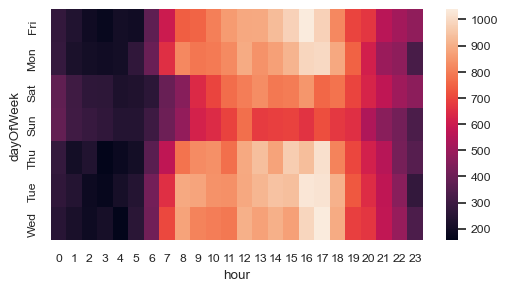

In [30]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(data = byHourAndDay)

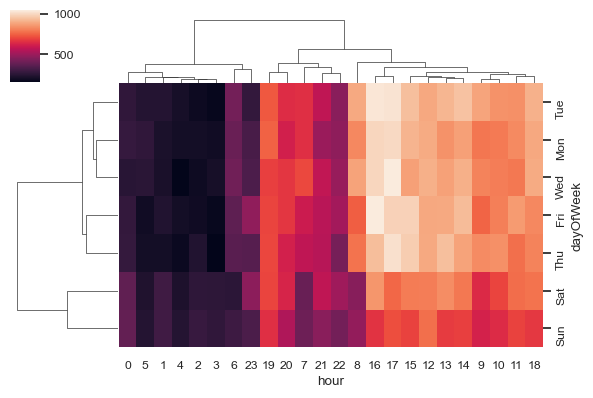

In [31]:
sns.clustermap(data = byHourAndDay, figsize = (6, 4))

In relation to the months:

In [32]:
byMonthAndDay = df.groupby(['month', 'dayOfWeek']).count()['reason'].unstack(level = 0)
byMonthAndDay

month,1,2,3,4,5,6,7,8,12
dayOfWeek,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot: xlabel='month', ylabel='dayOfWeek'>

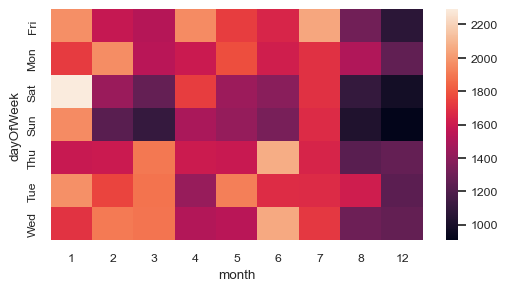

In [33]:
fig, ax = plt.subplots(figsize = (6, 3))
sns.heatmap(data = byMonthAndDay)

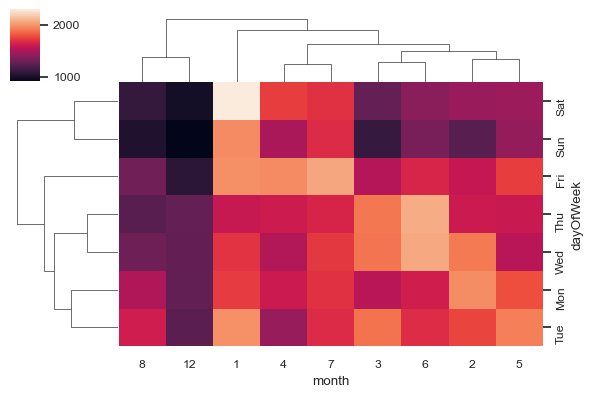

In [34]:
sns.clustermap(data = byMonthAndDay, figsize = (6, 4))


# That's all!